In [1]:
%load_ext autoreload
%autoreload 2

# Function Definitions and Setup

In [2]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from itertools import combinations_with_replacement, combinations

In [15]:
from itertools import product

combins = [(1, 5), (2, 2), (5, 1)]
distinct = [5, 20]

df_base = {}
df_truth = {}
for c, d in product(combins, distinct):
    df_base[(c, d)] = pd.read_csv(os.path.join("results", f"final_{c[0] * 100}_{c[1] * 100}_{d}.csv"))
    df_truth[(c, d)] = pd.read_csv(os.path.join("results", f"truth_final_{c[0] * 100}_{c[1] * 100}_{d}.csv"))
    print(f"{c[0] * 100}_{c[1] * 100}_{d}", df_base[(c, d)].shape, df_truth[(c, d)].shape)

100_500_5 (625, 67) (500, 31)
100_500_20 (625, 67) (500, 31)
200_200_5 (625, 67) (500, 31)
200_200_20 (625, 67) (500, 31)
500_100_5 (625, 67) (500, 31)
500_100_20 (625, 67) (500, 31)


In [16]:
df_global_base = pd.concat([df for df in df_base.values()])
df_global_base["n_claims_10k"] = df_global_base["n_claims"].round(-4)

two_list = ['TwoEstimates_score_perc_1', 'TwoEstimates_score_perc_2', 'TwoEstimates_score_perc_3']

df_global_base["TwoEstimates_score_perc_max"] = df_global_base[two_list].max(axis=1)
df_global_base["TwoEstimates_score_perc_min"] = df_global_base[two_list].min(axis=1)

df_global_base["TwoEstimates_score_perc_diff"] = df_global_base["TwoEstimates_score_perc_max"] - \
                                                 df_global_base["TwoEstimates_score_perc_min"]

df_global_base["_agg_total"] = 1
print(df_global_base.shape)
#df_global_base.to_csv(os.path.join("results", f"final_combined.csv"), index=False)

(3750, 72)


In [17]:
df_global_truth = pd.concat([df for df in df_truth.values()])
df_global_truth["n_claims_10k"] = df_global_truth["n_claims"].round(-4)

two_list = ['TwoEstimates_score_perc_1', 'TwoEstimates_score_perc_2', 'TwoEstimates_score_perc_3']

df_global_truth["TwoEstimates_score_perc_max"] = df_global_truth[two_list].max(axis=1)
df_global_truth["TwoEstimates_score_perc_min"] = df_global_truth[two_list].min(axis=1)

df_global_truth["TwoEstimates_score_perc_diff"] = df_global_truth["TwoEstimates_score_perc_max"] - \
                                                 df_global_truth["TwoEstimates_score_perc_min"]

df_global_truth["_agg_total"] = 1
print(df_global_truth.shape)
#df_global_truth.to_csv(os.path.join("results", f"final_combined.csv"), index=False)

(3000, 36)


In [20]:
df_global_base_reduced = df_global_base[df_global_truth.columns]
df_global = pd.concat([df_global_base_reduced, df_global_truth])
print(df_global.shape)
df_global.to_csv(os.path.join("results", f"final_truth_extension.csv"), index=False)

(6750, 36)


# Global Analysis

In [35]:
def plot_global(col, percent=True, title="Global Results for X-Axis Value", agg_type="mean", plot_type="bar", rot=0, df_filter=None):
    y_cols = ["TwoEstimates_score"]
    if percent:
        y_cols = [value + "_perc" for value in y_cols]
        y_cols.append("optimal_perc_score")
    else:
        y_cols.append("optimal_score")


    fig = plt.figure(figsize=(16, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    if not isinstance(col, list):
        col = [col]        
    
    if df_filter is not None:
        df_filtered = df_global.query(df_filter)
    else:
        df_filtered = df_global
    
    df_plot = df_filtered.groupby(col).agg(agg_type, numeric_only=True)[y_cols].reset_index()
        
    if set(df_plot[col[0]].unique()) == set(['F_S_TruncPareto', 'F_S_TruncExponential', 'F_TruncPareto', 'F_TruncExponential', 'Uniform', 
                                             'TruncExponential', 'TruncPareto', 'S_TruncExponential', 'S_TruncPareto']):
        df_plot[col[0]] = df_plot[col[0]].astype("category")
        df_plot[col[0]] = df_plot[col[0]].cat.set_categories(['F_S_TruncPareto', 'F_S_TruncExponential', 'F_TruncPareto', 'F_TruncExponential', 'Uniform', 
                                                              'TruncExponential', 'TruncPareto', 'S_TruncExponential', 'S_TruncPareto'])
        df_plot = df_plot.sort_values(col)
        
    df_plot.plot(kind=plot_type, x=col[0], y=y_cols, ax=ax, rot=rot, legend=False, color=['tab:green', 'tab:purple'])
    
    if percent:
        ax.set_ylim([0, 1])

    ax.set_title(title)
    ax.legend(["TwoEstimates", "Optimal"], loc='lower center', bbox_to_anchor=(0.5, -0.22), ncols=5)
    plt.show()
    

# Split Results

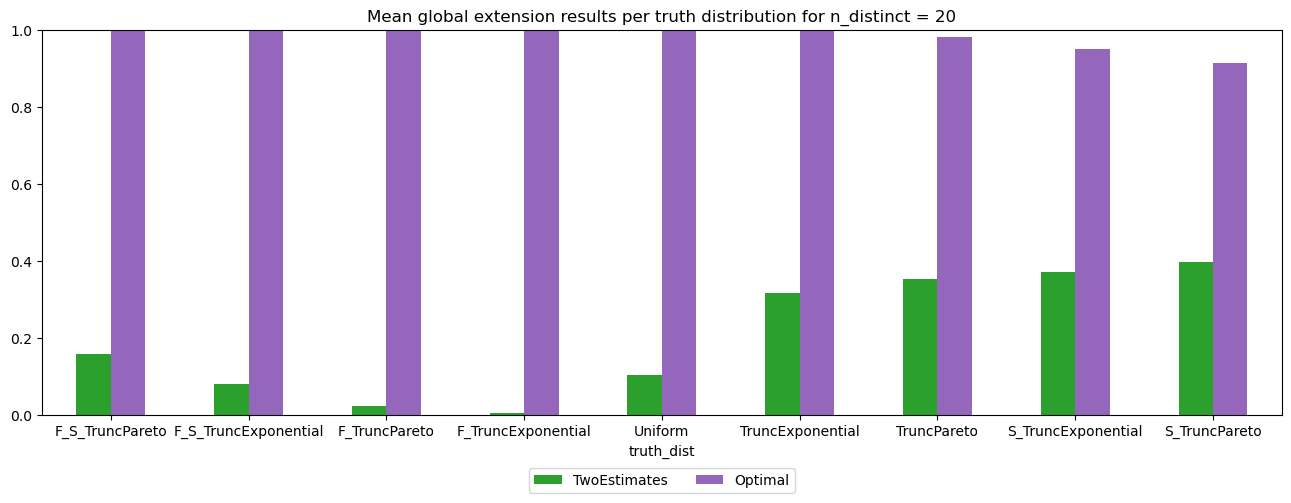

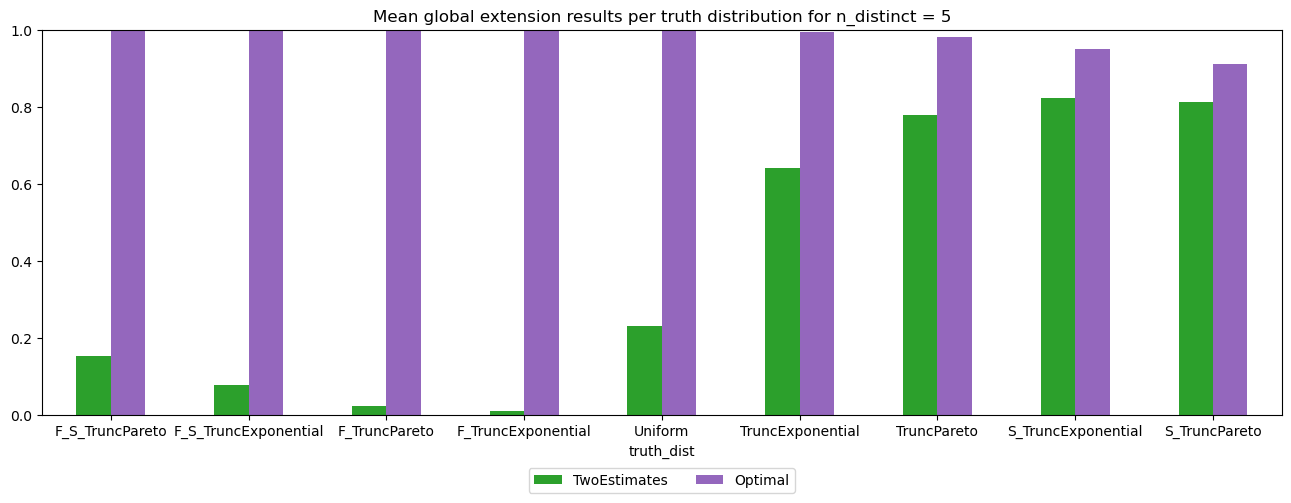

In [37]:
plot_global(col='truth_dist', title="Mean global extension results per truth distribution for n_distinct = 20", 
            df_filter="n_distinct == 20", plot_type="bar")
plot_global(col='truth_dist', title="Mean global extension results per truth distribution for n_distinct = 5", 
            df_filter="n_distinct == 5", plot_type="bar")